# Iowa Housing Project Data

First it is important to explore the data by doing Exploratory Data Analysis on any data in order to get a better understanding of what the data looks like such as if there are any missing values and what the data types are within the dataframe. Knowing this can help when trying to understand why data may be graphing itself in certain ways. But before I can start the analysis, I have to import the libraries I need and read in the dataset. 

### Import Libraries

In [2]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler, PolynomialFeatures

### Read in Dataset

In [3]:
ames = pd.read_csv('datasets/train.csv')
ames.head()

,Id,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,SalePrice
0,109,533352170,60,RL,NaN,13517,Pave,NaN,IR1,Lvl,...,0,0,NaN,NaN,NaN,0,3,2010,WD,130500
1,544,531379050,60,RL,43.0,11492,Pave,NaN,IR1,Lvl,...,0,0,NaN,NaN,NaN,0,4,2009,WD,220000
2,153,535304180,20,RL,68.0,7922,Pave,NaN,Reg,Lvl,...,0,0,NaN,NaN,NaN,0,1,2010,WD,109000
3,318,916386060,60,RL,73.0,9802,Pave,NaN,Reg,Lvl,...,0,0,NaN,NaN,NaN,0,4,2010,WD,174000
4,255,906425045,50,RL,82.0,14235,Pave,NaN,IR1,Lvl,...,0,0,NaN,NaN,NaN,0,3,2010,WD,138500


### Testing for Null Values

In [4]:
ames.isnull().sum().sort_values(ascending = False).head(50)

Pool QC           2042
Misc Feature      1986
Alley             1911
Fence             1651
Fireplace Qu      1000
Lot Frontage       330
Garage Finish      114
Garage Cond        114
Garage Qual        114
Garage Yr Blt      114
Garage Type        113
Bsmt Exposure       58
BsmtFin Type 2      56
BsmtFin Type 1      55
Bsmt Cond           55
Bsmt Qual           55
Mas Vnr Type        22
Mas Vnr Area        22
Bsmt Half Bath       2
Bsmt Full Bath       2
Garage Cars          1
Garage Area          1
Bsmt Unf SF          1
BsmtFin SF 2         1
Total Bsmt SF        1
BsmtFin SF 1         1
Overall Cond         0
Exterior 2nd         0
Exterior 1st         0
Roof Matl            0
Roof Style           0
Year Remod/Add       0
Year Built           0
SalePrice            0
Overall Qual         0
Land Contour         0
PID                  0
MS SubClass          0
MS Zoning            0
Lot Area             0
Street               0
Lot Shape            0
Utilities            0
House Style

### Listed Data Types

In [5]:
ames.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2051 entries, 0 to 2050
Data columns (total 81 columns):
Id                 2051 non-null int64
PID                2051 non-null int64
MS SubClass        2051 non-null int64
MS Zoning          2051 non-null object
Lot Frontage       1721 non-null float64
Lot Area           2051 non-null int64
Street             2051 non-null object
Alley              140 non-null object
Lot Shape          2051 non-null object
Land Contour       2051 non-null object
Utilities          2051 non-null object
Lot Config         2051 non-null object
Land Slope         2051 non-null object
Neighborhood       2051 non-null object
Condition 1        2051 non-null object
Condition 2        2051 non-null object
Bldg Type          2051 non-null object
House Style        2051 non-null object
Overall Qual       2051 non-null int64
Overall Cond       2051 non-null int64
Year Built         2051 non-null int64
Year Remod/Add     2051 non-null int64
Roof Style         20

### Correlations of the data compared to the Sale Price

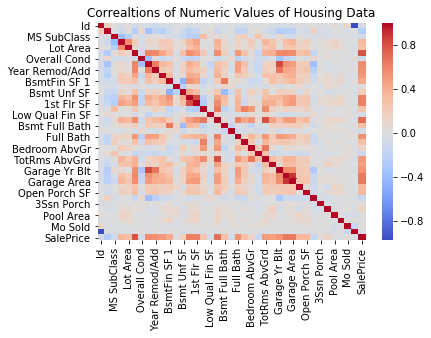

In [6]:
sns.heatmap(ames.corr(), cmap = 'coolwarm'); 
plt.title("Correaltions of Numeric Values of Housing Data");

##### I want to isolate looking at the column of Sale Price correlations, which is shown below

In [7]:
ames.corr()['SalePrice'].sort_values(ascending = False)

SalePrice          1.000000
Overall Qual       0.800207
Gr Liv Area        0.697038
Garage Area        0.650270
Garage Cars        0.648220
Total Bsmt SF      0.628925
1st Flr SF         0.618486
Year Built         0.571849
Year Remod/Add     0.550370
Full Bath          0.537969
Garage Yr Blt      0.533922
Mas Vnr Area       0.512230
TotRms AbvGrd      0.504014
Fireplaces         0.471093
BsmtFin SF 1       0.423519
Lot Frontage       0.341842
Open Porch SF      0.333476
Wood Deck SF       0.326490
Lot Area           0.296566
Bsmt Full Bath     0.283662
Half Bath          0.283001
2nd Flr SF         0.248452
Bsmt Unf SF        0.190210
Bedroom AbvGr      0.137067
Screen Porch       0.134581
3Ssn Porch         0.048732
Mo Sold            0.032735
Pool Area          0.023106
BsmtFin SF 2       0.016255
Misc Val          -0.007375
Yr Sold           -0.015203
Low Qual Fin SF   -0.041594
Bsmt Half Bath    -0.045328
Id                -0.051398
MS SubClass       -0.087335
Overall Cond      -0

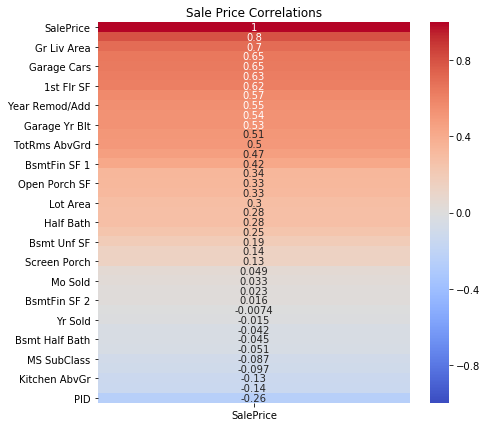

In [8]:
plt.figure(figsize = (7,7))
sns.heatmap(ames.corr()[['SalePrice']].sort_values(by = ['SalePrice'], ascending = False), 
            annot = True, cmap = 'coolwarm', vmin = -1)
plt.title('Sale Price Correlations');

##### In order to look at the graphs of the correlations that were above .5, I created scatter plots of different columns to get a better idea of what the shape of the data looked like.

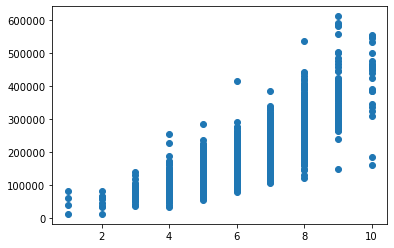

In [9]:
plt.scatter(ames['Overall Qual'], ames["SalePrice"])

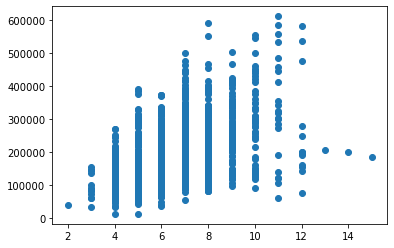

In [10]:
plt.scatter(ames['TotRms AbvGrd'], ames['SalePrice'])

### Creating a model of data with a positive correlation above .5

In [11]:
pos_corr_above_fifty = ["Overall Qual", "Gr Liv Area", "1st Flr SF", 
                        "Year Built", "Year Remod/Add", "Full Bath", "TotRms AbvGrd"]
X = ames[pos_corr_above_fifty]
y = ames['SalePrice']

In [12]:
ames[pos_corr_above_fifty].isnull().sum()

Overall Qual      0
Gr Liv Area       0
1st Flr SF        0
Year Built        0
Year Remod/Add    0
Full Bath         0
TotRms AbvGrd     0
dtype: int64

In [13]:
lr_model = LinearRegression()
X_train, X_test, y_train, y_test = train_test_split(X, y)

In [14]:
lr_model.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [15]:
cross_val_score(lr_model, X_train, y_train, cv = 5).mean()

0.7392090481913672

In [16]:
lr_model.score(X_train, y_train)

0.7614422791853197

In [17]:
lr_model.score(X_test, y_test)

0.832997097652709

### Created Dataframe for Submission to Kaggle

##### Created a dataframe in the correct format in order to submit to the Kaggle platform

In [18]:
test = pd.read_csv('datasets/test.csv')

In [19]:
pred_1 = lr_model.predict(test[pos_corr_above_fifty])

In [20]:
first_model = pd.DataFrame({
    'Id': test['Id'],
    'SalePrice': pred_1
})

In [21]:
first_model.to_csv('Preds/first_model.csv', index = False)

### Further EDA for creating another model

##### Below I created pairplots of all the different variables in the correlation chart, but only charts in relation to sales price in order to get a better understanding of the shape of the data.

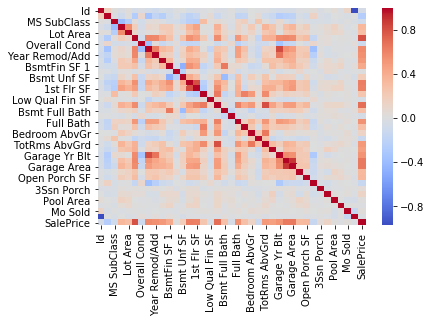

In [22]:
sns.heatmap(ames.corr(), cmap = 'coolwarm')

In [23]:
ames[ames['Lot Area'] > 100_000]

,Id,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,SalePrice
471,2116,906426060,50,RL,NaN,159000,Pave,NaN,IR2,Low,...,0,0,NaN,NaN,Shed,500,6,2007,WD,277000
694,2072,905301050,20,RL,NaN,115149,Pave,NaN,IR2,Low,...,0,0,NaN,NaN,NaN,0,6,2007,WD,302000


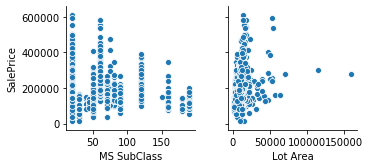

In [24]:
sns.pairplot(ames, x_vars = ['MS SubClass', 'Lot Area'], y_vars = ['SalePrice'])

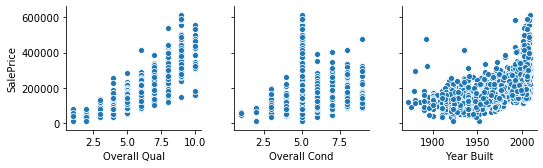

In [25]:
sns.pairplot(ames, x_vars = ['Overall Qual', 'Overall Cond', 'Year Built'], y_vars = ['SalePrice'])

In [26]:
ames[ames['BsmtFin SF 1'] > 3500]

,Id,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,SalePrice
960,1499,908154235,60,RL,313.0,63887,Pave,NaN,IR3,Bnk,...,0,480,Gd,NaN,NaN,0,1,2008,New,160000
1885,2181,908154195,20,RL,128.0,39290,Pave,NaN,IR1,Bnk,...,0,0,NaN,NaN,Elev,17000,10,2007,New,183850


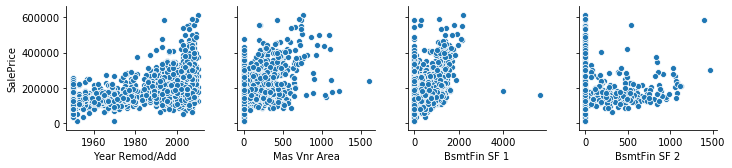

In [27]:
sns.pairplot(ames, x_vars = ['Year Remod/Add', 'Mas Vnr Area', 'BsmtFin SF 1', 'BsmtFin SF 2'], y_vars = ['SalePrice'])

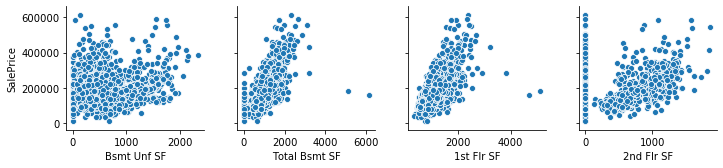

In [28]:
sns.pairplot(ames, x_vars = ['Bsmt Unf SF', 'Total Bsmt SF', '1st Flr SF', '2nd Flr SF'], y_vars = ['SalePrice'])

In [29]:
ames[ames['Total Bsmt SF'] > 4000]

,Id,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,SalePrice
960,1499,908154235,60,RL,313.0,63887,Pave,NaN,IR3,Bnk,...,0,480,Gd,NaN,NaN,0,1,2008,New,160000
1885,2181,908154195,20,RL,128.0,39290,Pave,NaN,IR1,Bnk,...,0,0,NaN,NaN,Elev,17000,10,2007,New,183850


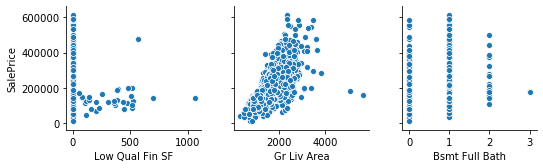

In [30]:
sns.pairplot(ames, x_vars = ['Low Qual Fin SF', 'Gr Liv Area', 'Bsmt Full Bath'], y_vars = ['SalePrice'])

In [31]:
ames[ames['Low Qual Fin SF'] > 550]

,Id,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,SalePrice
828,661,535381040,50,RL,60.0,10410,Pave,Grvl,Reg,Lvl,...,0,0,NaN,NaN,NaN,0,6,2009,WD,142900
1035,2667,902400110,75,RM,90.0,22950,Pave,NaN,IR2,Lvl,...,410,0,NaN,GdPrv,NaN,0,6,2006,WD,475000
1239,1362,903454100,50,RM,60.0,6876,Pave,NaN,Reg,Bnk,...,0,0,NaN,NaN,NaN,0,11,2008,COD,141000


In [32]:
ames[ames['Gr Liv Area'] > 4000]

,Id,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,SalePrice
960,1499,908154235,60,RL,313.0,63887,Pave,NaN,IR3,Bnk,...,0,480,Gd,NaN,NaN,0,1,2008,New,160000
1885,2181,908154195,20,RL,128.0,39290,Pave,NaN,IR1,Bnk,...,0,0,NaN,NaN,Elev,17000,10,2007,New,183850


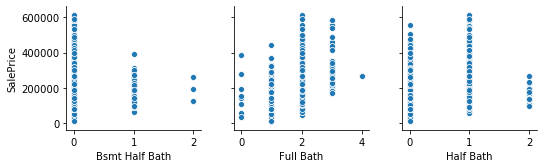

In [33]:
sns.pairplot(ames, x_vars = ['Bsmt Half Bath', 'Full Bath', 'Half Bath'], y_vars = ['SalePrice'])

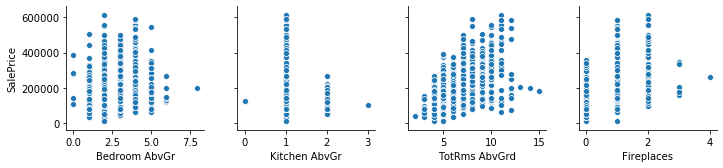

In [34]:
sns.pairplot(ames, x_vars = ['Bedroom AbvGr', 'Kitchen AbvGr', 'TotRms AbvGrd', 'Fireplaces'], y_vars = ['SalePrice'])

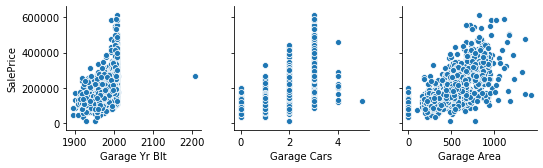

In [35]:
sns.pairplot(ames, x_vars = ['Garage Yr Blt', 'Garage Cars', 'Garage Area'], y_vars = ['SalePrice'])

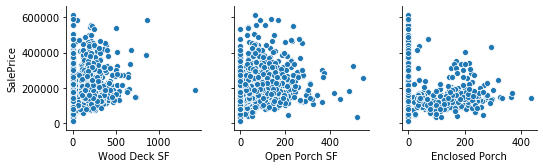

In [36]:
sns.pairplot(ames, x_vars = ['Wood Deck SF', 'Open Porch SF', 'Enclosed Porch'], y_vars = ['SalePrice'])

In [37]:
ames[ames['Wood Deck SF'] > 1000]

,Id,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,SalePrice
966,2294,923229100,80,RL,NaN,15957,Pave,NaN,IR1,Low,...,0,0,NaN,MnPrv,NaN,0,9,2007,WD,188000


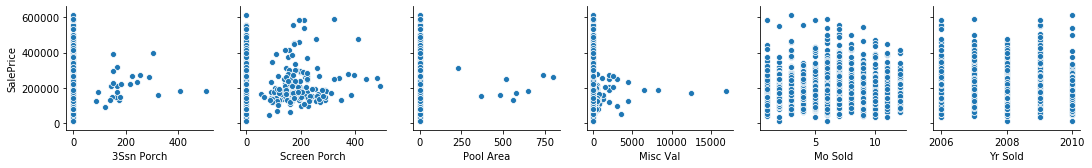

In [38]:
sns.pairplot(ames, x_vars = ['3Ssn Porch', 'Screen Porch', 'Pool Area', 'Misc Val', 'Mo Sold', 'Yr Sold'], y_vars = ['SalePrice'])

In [39]:
all_corr = ['Overall Qual', 'Overall Cond', 'Year Built', 'Year Remod/Add', 'Mas Vnr Area', 'BsmtFin SF 1', 'BsmtFin SF 2', 
 'Bsmt Unf SF', 'Total Bsmt SF', '1st Flr SF', '2nd Flr SF', 'Low Qual Fin SF', 'Gr Liv Area', 'Bsmt Full Bath', 
 'Bsmt Half Bath', 'Full Bath', 'Half Bath', 'Bedroom AbvGr', 'Kitchen AbvGr', 'TotRms AbvGrd', 'Fireplaces', 
 'Garage Yr Blt', 'Garage Cars', 'Garage Area', 'Wood Deck SF', 'Open Porch SF', 'Enclosed Porch', 
 '3Ssn Porch', 'Screen Porch', 'Pool Area', 'Misc Val', 'Mo Sold', 'Yr Sold']

##### After completeing further EDA I was able to spot outliers in the data to see how much they could have been affecting the model. I chose to drop the outliers because I wanted to see if it would improve model performance.

In [40]:
ames[ames['BsmtFin SF 1'] > 3500]


,Id,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,SalePrice
960,1499,908154235,60,RL,313.0,63887,Pave,NaN,IR3,Bnk,...,0,480,Gd,NaN,NaN,0,1,2008,New,160000
1885,2181,908154195,20,RL,128.0,39290,Pave,NaN,IR1,Bnk,...,0,0,NaN,NaN,Elev,17000,10,2007,New,183850


In [41]:
ames.drop([960, 1885], inplace = True)

##### Because I wanted to use data that had null values, I decided that instead of dropping the rows with null values that I would just fill them in with zeros because in this case it is an accurate assumption to think that some of these values could be zeros.

In [42]:
ames[all_corr].fillna(0)

,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Mas Vnr Area,BsmtFin SF 1,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,1st Flr SF,...,Garage Area,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Misc Val,Mo Sold,Yr Sold
0,6,8,1976,2005,289.0,533.0,0.0,192.0,725.0,725,...,475.0,0,44,0,0,0,0,0,3,2010
1,7,5,1996,1997,132.0,637.0,0.0,276.0,913.0,913,...,559.0,0,74,0,0,0,0,0,4,2009
2,5,7,1953,2007,0.0,731.0,0.0,326.0,1057.0,1057,...,246.0,0,52,0,0,0,0,0,1,2010
3,5,5,2006,2007,0.0,0.0,0.0,384.0,384.0,744,...,400.0,100,0,0,0,0,0,0,4,2010
4,6,8,1900,1993,0.0,0.0,0.0,676.0,676.0,831,...,484.0,0,59,0,0,0,0,0,3,2010
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2046,8,5,2007,2007,0.0,1011.0,0.0,873.0,1884.0,1728,...,520.0,0,276,0,0,0,0,0,1,2008
2047,4,5,1940,1950,0.0,262.0,0.0,599.0,861.0,861,...,539.0,158,0,0,0,0,0,0,3,2009
2048,6,6,1928,1950,0.0,0.0,0.0,896.0,896.0,1172,...,342.0,0,0,0,0,0,0,0,3,2009
2049,4,5,1956,1956,0.0,155.0,750.0,295.0,1200.0,1200,...,294.0,0,189,140,0,0,0,0,11,2009


In [43]:
ames[all_corr].isnull().sum()

Overall Qual         0
Overall Cond         0
Year Built           0
Year Remod/Add       0
Mas Vnr Area        22
BsmtFin SF 1         1
BsmtFin SF 2         1
Bsmt Unf SF          1
Total Bsmt SF        1
1st Flr SF           0
2nd Flr SF           0
Low Qual Fin SF      0
Gr Liv Area          0
Bsmt Full Bath       2
Bsmt Half Bath       2
Full Bath            0
Half Bath            0
Bedroom AbvGr        0
Kitchen AbvGr        0
TotRms AbvGrd        0
Fireplaces           0
Garage Yr Blt      114
Garage Cars          1
Garage Area          1
Wood Deck SF         0
Open Porch SF        0
Enclosed Porch       0
3Ssn Porch           0
Screen Porch         0
Pool Area            0
Misc Val             0
Mo Sold              0
Yr Sold              0
dtype: int64

In [44]:
new_ames = ames[all_corr].fillna(0)

In [45]:
new_ames.isnull().sum()

Overall Qual       0
Overall Cond       0
Year Built         0
Year Remod/Add     0
Mas Vnr Area       0
BsmtFin SF 1       0
BsmtFin SF 2       0
Bsmt Unf SF        0
Total Bsmt SF      0
1st Flr SF         0
2nd Flr SF         0
Low Qual Fin SF    0
Gr Liv Area        0
Bsmt Full Bath     0
Bsmt Half Bath     0
Full Bath          0
Half Bath          0
Bedroom AbvGr      0
Kitchen AbvGr      0
TotRms AbvGrd      0
Fireplaces         0
Garage Yr Blt      0
Garage Cars        0
Garage Area        0
Wood Deck SF       0
Open Porch SF      0
Enclosed Porch     0
3Ssn Porch         0
Screen Porch       0
Pool Area          0
Misc Val           0
Mo Sold            0
Yr Sold            0
dtype: int64

### Created variables, train_test_split, fit, and scored model

In [46]:
X = new_ames
y = ames['SalePrice']

second_model = LinearRegression()

In [47]:
X.shape

(2049, 33)

In [48]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 42)

In [49]:
second_model.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [50]:
cross_val_score(second_model, X_train, y_train, cv = 5).mean()

0.8536360938663968

In [51]:
second_model.score(X_train, y_train)

0.8652307173676026

In [52]:
second_model.score(X_test, y_test)

0.8843036889636955

##### Dropping the outliers improved the score of the model overall.

### Matching Train and Test Data

##### Matched my testing data to look like my training data in order to sumbit to Kaggle.

In [53]:
test[all_corr].isnull().sum()

Overall Qual        0
Overall Cond        0
Year Built          0
Year Remod/Add      0
Mas Vnr Area        1
BsmtFin SF 1        0
BsmtFin SF 2        0
Bsmt Unf SF         0
Total Bsmt SF       0
1st Flr SF          0
2nd Flr SF          0
Low Qual Fin SF     0
Gr Liv Area         0
Bsmt Full Bath      0
Bsmt Half Bath      0
Full Bath           0
Half Bath           0
Bedroom AbvGr       0
Kitchen AbvGr       0
TotRms AbvGrd       0
Fireplaces          0
Garage Yr Blt      45
Garage Cars         0
Garage Area         0
Wood Deck SF        0
Open Porch SF       0
Enclosed Porch      0
3Ssn Porch          0
Screen Porch        0
Pool Area           0
Misc Val            0
Mo Sold             0
Yr Sold             0
dtype: int64

In [54]:
cleaned_test = test[all_corr].fillna(0)
second_preds = second_model.predict(cleaned_test)

In [55]:
sec_model = pd.DataFrame({
    'Id': test['Id'],
    'SalePrice': second_preds
})

In [56]:
sec_model.to_csv('Preds/sec_model.csv', index = False)

### Model based on Research

##### For this model, I research different variables that might affect housing prices, so I created one model where I included all variables that might affect the price of a house.

##### For another model I made in this section, in further research I found, their were some variables that negatively affected or did not have much of an affect on pricing of a house, so I decided to delete some variables from the previously created variables list.

In [57]:
researched = ['Neighborhood', 'MS SubClass', 'Lot Area', '1st Flr SF', '2nd Flr SF', 'Low Qual Fin SF', 
             'Gr Liv Area', 'Total Bsmt SF', 'Full Bath', 'Half Bath', 'Bedroom AbvGr', 'TotRms AbvGrd', 'Fireplaces',
             'Garage Area', 'Wood Deck SF', 'Open Porch SF', 'Enclosed Porch', '3Ssn Porch', 'Screen Porch',
             'Pool Area']

ames[researched].isnull().sum()

Neighborhood       0
MS SubClass        0
Lot Area           0
1st Flr SF         0
2nd Flr SF         0
Low Qual Fin SF    0
Gr Liv Area        0
Total Bsmt SF      1
Full Bath          0
Half Bath          0
Bedroom AbvGr      0
TotRms AbvGrd      0
Fireplaces         0
Garage Area        1
Wood Deck SF       0
Open Porch SF      0
Enclosed Porch     0
3Ssn Porch         0
Screen Porch       0
Pool Area          0
dtype: int64

### Create X and y values and dummies values for categories to add to X values

In [58]:
X = pd.get_dummies(ames[researched], 'Neighborhood').fillna(0)
X.shape

(2049, 47)

In [59]:
y = ames['SalePrice']
y.shape

(2049,)

### Create, fit  and score model

In [60]:
research_model = LinearRegression()
X_train, X_test, y_train, y_test = train_test_split(X, y)

In [61]:
cross_val_score(research_model, X_train, y_train, cv = 5).mean()

0.8215858944604252

In [62]:
research_model.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [63]:
research_model.score(X_train, y_train)

0.8409587908871993

In [64]:
research_model.score(X_test, y_test)

0.8539469752919884

### Create file to sumbit to Kaggle

In [65]:
test = pd.read_csv('datasets/test.csv')
X = pd.get_dummies(test[researched], 'Neighborhood').fillna(0)
X.shape

(878, 45)

In [66]:
[col for col in X_train.columns if col not in X.columns]

['Neighborhood_GrnHill', 'Neighborhood_Landmrk']

In [67]:
X['Neighborhood_GrnHill'] = 0

In [68]:
X['Neighborhood_Landmrk'] = 0

In [69]:
X.shape

(878, 47)

In [70]:
predictions = research_model.predict(X)

In [71]:
res_model = pd.DataFrame({'Id': test['Id'], 'SalePrice': predictions})

In [72]:
res_model.to_csv('Preds/res_model.csv', index = False)

### Creating another model based on research

##### Created a new set of variables to see how the model would change if I reduced variables that may not have affected the price of a house according to another article I read. 

In [73]:
researched_2 = ['Neighborhood', 'MS SubClass', 'Lot Area', '1st Flr SF', '2nd Flr SF', 'Low Qual Fin SF', 
             'Gr Liv Area', 'Total Bsmt SF', 'Full Bath', 'Half Bath', 'Bedroom AbvGr', 'TotRms AbvGrd', 'Fireplaces',
             'Garage Area']

X = pd.get_dummies(ames[researched_2], 'Neighborhood').fillna(0)
y = ames['SalePrice']

research_2_model = LinearRegression()
X_train, X_test, y_train, y_test = train_test_split(X, y)

research_2_model.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [74]:
cross_val_score(research_2_model, X_train, y_train, cv = 5).mean()

0.8233538938833689

In [75]:
research_2_model.score(X_train, y_train)

0.8383199614893152

In [76]:
research_2_model.score(X_test, y_test)

0.8366558779242924

### Creating a Lasso Model

In order to try for a model that performs better, I want to try regularizing my researched model with all the researched variables from above. Below I am importing the necessary classes in order to create polynomial features, scaled features and create a regularized model.

In [77]:
from sklearn.linear_model import LassoCV
from sklearn.preprocessing import StandardScaler, PolynomialFeatures

In [78]:
X = pd.get_dummies(ames[researched], 'Neighborhood').fillna(0)

y = ames['SalePrice']

poly = PolynomialFeatures(include_bias = False)

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 42)

poly.fit(X_train)

X_train_poly = poly.transform(X_train)
X_test_poly = poly.transform(X_test)

In [79]:
X_train_poly.shape

(1536, 1175)

In [80]:
y_train.shape

(1536,)

In [81]:
ss = StandardScaler()

ss.fit(X_train_poly)

X_train_polys = ss.transform(X_train_poly)
X_test_polys = ss.transform(X_test_poly)

In [82]:
X_train_polys.shape

(1536, 1175)

In [83]:
y_train.shape

(1536,)

In [84]:
LaCV = LassoCV(max_iter = 1000, cv=3)

LaCV.fit(X_train_polys, y_train)

print(LaCV.score(X_train_polys, y_train))

C:\Users\raven\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 647348757.0517578, tolerance: 643395564.8487967
  positive)
C:\Users\raven\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 711646595.4483032, tolerance: 643395564.8487967
  positive)


0.9066255984805126


In [85]:
print(LaCV.score(X_test_polys, y_test))

0.8795772055828334


### Indenified Coefficients from the Lasso Model

In [1]:
df = pd.DataFrame({'Features': poly.get_feature_names(), 'Coef': LaCV.coef_})

NameError: name 'pd' is not defined

In [ ]:
df.head()

In [107]:
df[df['Coef'] > 5000]

,Features,Coef
5,Gr Liv Area,10005.407458
6,Total Bsmt SF,6530.392993
176,1st Flr SF Neighborhood_NridgHt,7531.856213
273,Gr Liv Area Total Bsmt SF,18691.756655
279,Gr Liv Area Garage Area,9067.656672
506,TotRms AbvGrd Neighborhood_StoneBr,7983.316158
542,Fireplaces Neighborhood_StoneBr,5964.982248
578,Garage Area Neighborhood_Timber,5492.796131


### Created a Ridge Model to compare to the Lasso Model

In [108]:
from sklearn.linear_model import RidgeCV

In [109]:
rid = RidgeCV()

rid.fit(X_train_polys, y_train)

print(rid.score(X_train_polys, y_train))

0.9455507717137283


In [112]:
print(rid.score(X_test_polys, y_test))

0.852965739311387


### Identifying Coefficients from the Ridge Model

In [111]:
df_2 = pd.DataFrame({'Features': poly.get_feature_names(X.columns), 'Coef': rid.coef_})
df_2[df_2['Coef'] > 5000]

,Features,Coef
0,MS SubClass,7116.592186
1,Lot Area,7906.345571
2,1st Flr SF,7212.437078
5,Gr Liv Area,7781.210679
6,Total Bsmt SF,10775.589923
9,Bedroom AbvGr,8918.022363
90,MS SubClass Neighborhood_Somerst,6531.751928
127,Lot Area Neighborhood_NAmes,6194.000255
130,Lot Area Neighborhood_NoRidge,6921.265654
136,Lot Area Neighborhood_Somerst,8580.938901
